# Convolutional Neural Network

### Importing the libraries 


In [4]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

This section will cover a process called _image augmentation_, which involves applying transformations to images from the training set, and creating new samples from the original image. Such transformations include:
- rotations
- scalling, also known as _feature scalling_
- flipping
- color manipulation of
    - brightnes
    - saturation
    - hue
- contrast
- blurring
- sharpening
- cropping

Training with distorted versions of the same image helps the CNN to detect important features. In short, this process helps the CNN to generalize better and increase its performance in real-world applications. This is done to create a more robust training set without taking hours and hours collecting new images. 

The benefits of using image augmentation are:
- saves time
- avoids overfitting

### Preprocessing the training set
the inputs of the ImageDataGenerator that will be used are the following: 
1) _rescale_: is _feature scalling_, in this case the normalization follows this equation
$$ x_{\text{norm}} = \frac{x}{2^{N}-1} $$ 
2) _shear_range_: this is easier to perceive than to express in words, let's plot some images to see what this effect is about

Firstly, let's plot the original image to see the reference

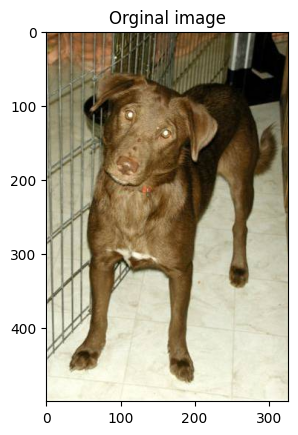

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array

img_path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set/dogs/dog.1.jpg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255 #normalization

plt.imshow(img_array[0])
plt.title('Orginal image')
plt.show()

Secondly, we'll shear the previuos image

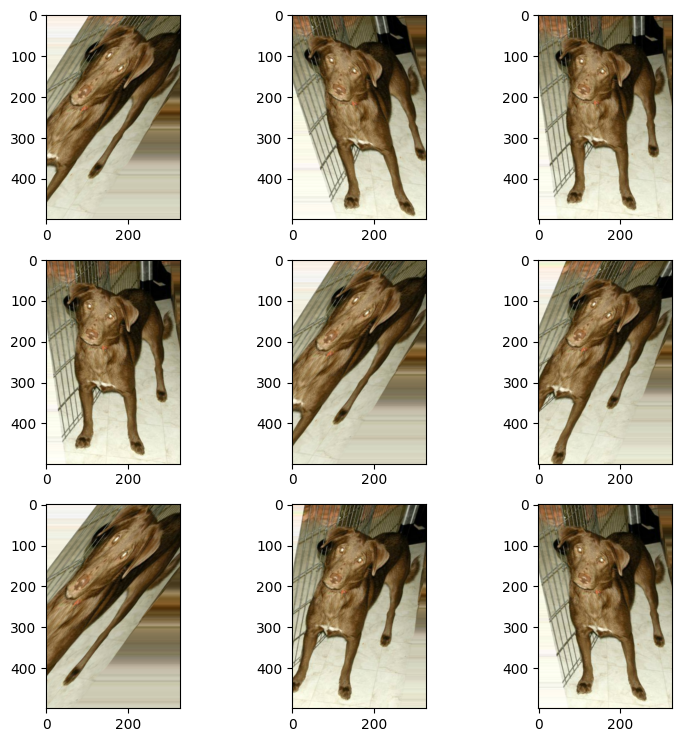

In [6]:
img_path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set/dogs/dog.1.jpg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

datagen = ImageDataGenerator(shear_range=50.5)

pic = datagen.flow(img_array, batch_size=1)
plt.figure(figsize=(9,9))
for i in range(1,10):
    plt.subplot(3,3,i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)

so the explanation is that the image will be distorted along an axis. 

3) _zoom_range_: applies zoom over the images, this is much more noticible than the previous effect.

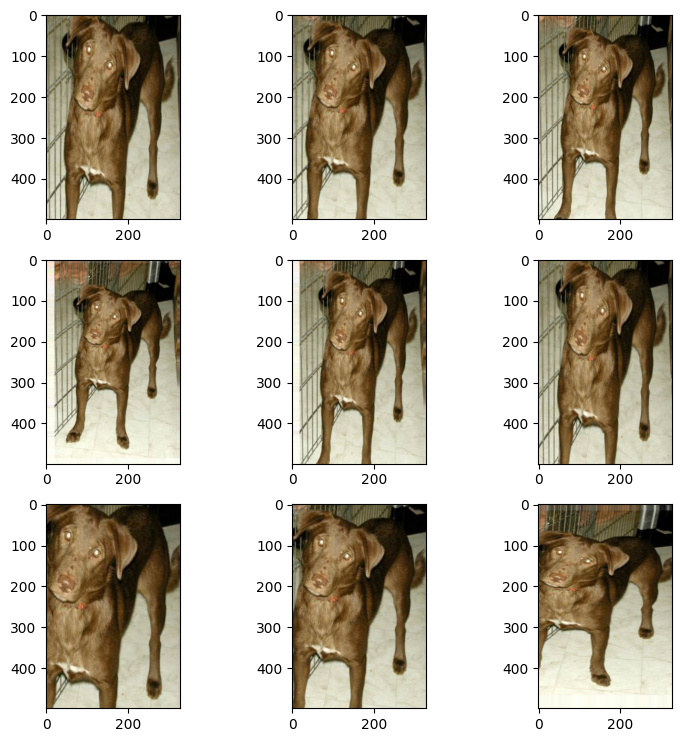

In [7]:
img_path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set/dogs/dog.1.jpg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

datagen = ImageDataGenerator(zoom_range=0.5)

pic = datagen.flow(img_array, batch_size=1)
plt.figure(figsize=(9,9))
for i in range(1,10):
    plt.subplot(3,3,i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)

4) _horizontal_flip_: flips the image horizontaly
5) _vertical_flip_: flips the image verticaly

both effects are easily detectable 

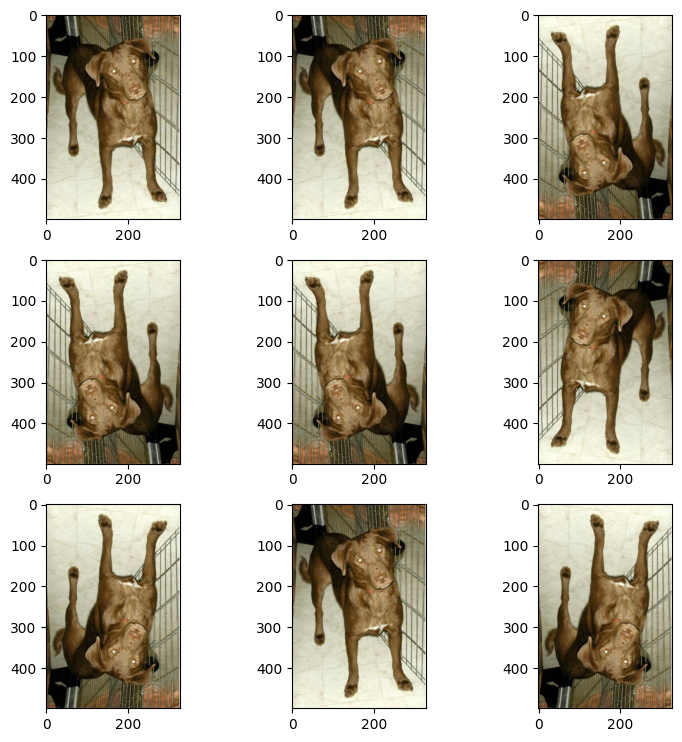

In [8]:
img_path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set/dogs/dog.1.jpg'
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

pic = datagen.flow(img_array, batch_size=1)
plt.figure(figsize=(9,9))
for i in range(1,10):
    plt.subplot(3,3,i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)

So the following code is where the image augmentation is carried out

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, #feature scalling
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True)


The flow_from_directory method connects the augmented images set with the training set. Their atributes are:
1) _target_size_: 
2) _batch_size_: is 
3) _class_mode_: This parameter must be set to 'binary' because this is a binary classification problem where the image can be either a cat or a dog.

In [10]:
path_trainingset = 'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/training_set'
training_set = train_datagen.flow_from_directory(
    path_trainingset, # path of the training set
    target_size = (64,64), #(150, 150) the training was really slow
    batch_size = 32, #
    class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In deep learning, training a neural network usually involves processing a large amount of data. This data is often too large to be processed all at once, so it is typically divided into smaller subsets, or batches, that can be processed one at a time. The batch_size parameter determines the number of samples (i.e., data points) that are processed in each batch.

During training, the neural network is fed a batch of samples, and the weights of the network are updated based on the errors made on those samples. The process of updating the weights is called backpropagation, and it involves computing the gradient of the loss function with respect to the weights. The gradient is then used to update the weights of the network using an optimization algorithm such as stochastic gradient descent.

The batch_size parameter plays an important role in the backpropagation algorithm because it determines how many samples are processed before the weights of the neural network are updated. A larger batch size means that more samples are processed before the weights are updated, which can result in a more stable estimate of the gradient. This is because the error signals from multiple samples are averaged together, which can help to smooth out noise in the gradient estimate. However, a larger batch size also requires more memory to store the intermediate values during training, which can be a problem on limited-memory devices.

Conversely, a smaller batch size means that fewer samples are processed before the weights are updated. This can result in a more noisy estimate of the gradient, since the error signals from fewer samples are averaged together. However, a smaller batch size requires less memory to store the intermediate values during training, and can allow the model to learn more quickly and converge to a better solution.

Overall, the batch_size parameter is an important hyperparameter in deep learning that can have a significant impact on the performance of a neural network. It is typically chosen based on the available memory and the characteristics of the dataset being used for training.

### Preprocessing the Test set

In [310]:
test_datagen = ImageDataGenerator(rescale=1./255)
path_testset = 'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/test_set' 
test_set = test_datagen.flow_from_directory(
    path_testset,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN


### Initialising the CNN


In [311]:
cnn = tf.keras.models.Sequential()

### Setp 1 - Convolution

The convolution is a linear operator determined by the following equation
$$ f * g = \int_{-\infty}^{\infty} f(\tau)g(t-\tau) \ d\tau$$

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, activation = 'relu',input_shape=[64,64,3]))

### Step 2 - Pooling

This process tries to find the distinctive features of an image, and creates a reduced-size version of the image by eliminating the irrelevant information.
There are three main benefits:
- _reduce overfitting_, because the irrelevant information was cut out
- it helps to achive _spacial invariance_, which means that no matter how stretched or which orientation the image would take, it'll be recognized by the CNN  
- _reduces the amount of computations_ needed to classify this image

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

### Adding a second convolutional layer


In [11]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides=2))

### Step 3 - Flattening
This is done to fit the images of the pooling layer, which are in an $n \times m$ shape, into an input layer of the Artificial Neural Network, which is required to be in $ 1 \times n\cdot m $ shape

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection


In [13]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer 
This function is used to ensure that the sumation of all the probabilities returned by the output layer would be equal to 1. In other words, it creates a probability space were the output with the bigest value of $z_i$ is the class with the highest chances of being the correct answer.

Here it is the equation that represents the softmax activation function
$$ f_j (z) = \frac{e^{zj}}{\sum_{k=1}^{N} e^{zk}} $$

In [14]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN


### Compiling the CNN
It's used as loss function for CNNs in classification problems, which works better than Mean Square Error (MSE).
The equation of the cross-entropy is
$$ L_i = -\log \bigg( \frac{e^{f_{y_i}}}{\sum_{j=1}^{N} e^{f_j}} \bigg)$$
but for simplicity and to adress the main concept let's use the classic definition of entropy in an information system  
$$ H(p,q) = - \sum_{x=1}^{N} p(x)\log q(x) $$
where $p$ is the label and in $q$ is the output with the highest probability 


In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the training set an evaluation it on the test set


In [16]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25,)

Epoch 1/25
250/250 [==============================] - 40s 157ms/step - loss: 0.6733 - accuracy: 0.5791 - val_loss: 0.6317 - val_accuracy: 0.6440
Epoch 2/25
250/250 [==============================] - 39s 154ms/step - loss: 0.6084 - accuracy: 0.6687 - val_loss: 0.6730 - val_accuracy: 0.6255
Epoch 3/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5744 - accuracy: 0.6994 - val_loss: 0.5429 - val_accuracy: 0.7335
Epoch 4/25
250/250 [==============================] - 38s 152ms/step - loss: 0.5371 - accuracy: 0.7304 - val_loss: 0.5084 - val_accuracy: 0.7570
Epoch 5/25
250/250 [==============================] - 38s 151ms/step - loss: 0.5010 - accuracy: 0.7487 - val_loss: 0.5132 - val_accuracy: 0.7515
Epoch 6/25
250/250 [==============================] - 39s 154ms/step - loss: 0.4933 - accuracy: 0.7545 - val_loss: 0.5474 - val_accuracy: 0.7300
Epoch 7/25
250/250 [==============================] - 38s 153ms/step - loss: 0.4640 - accuracy: 0.7766 - val_loss: 0.4661 - val_ac

## Part 4 - Making a single prediction


1/1 [==============================] - 0s 36ms/step
The prediction is dog


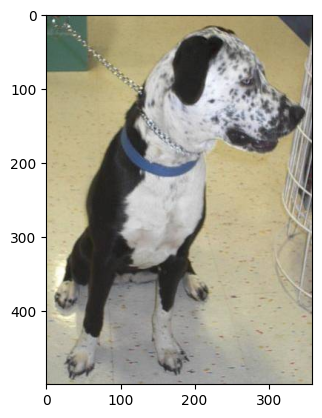

In [143]:
import numpy as np
from keras import utils
import matplotlib.pyplot as plt

cat_or_dog = ['cat','dog']
index = np.random.randint(0,2)
number = np.random.randint(4001,5001)
path = f'C:/Users/Asus/Desktop/programitas/CatDogClassifier/dataset/test_set/{cat_or_dog[index]}s/{cat_or_dog[index]}.{number}.jpg'

test_image = utils.load_img(path,target_size = (64,64))
test_image = utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

file = plt.imread(path)
plt.imshow(file)

print(f'The prediction is {prediction}')